# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [3]:
data = pd.read_csv("../data/housing.csv")

In [4]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

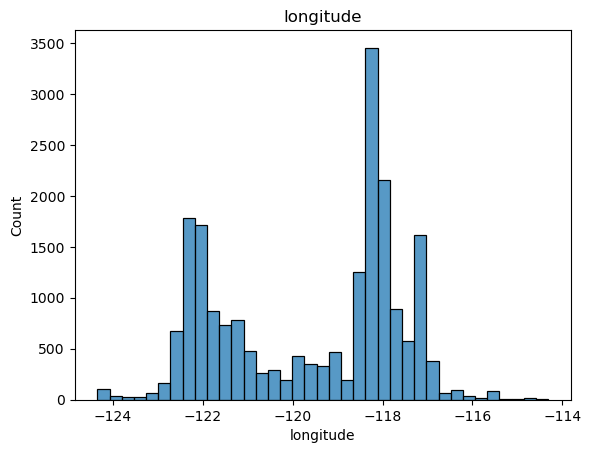

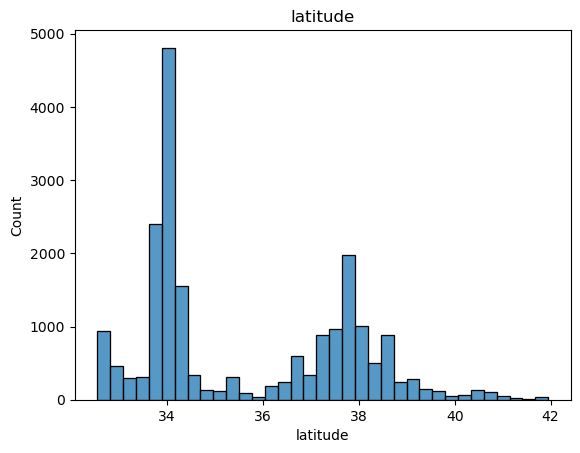

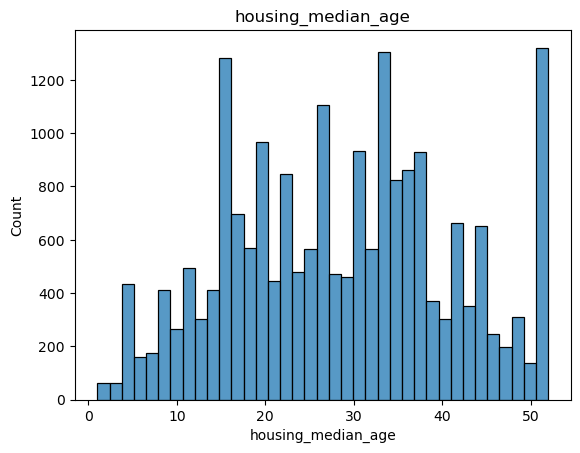

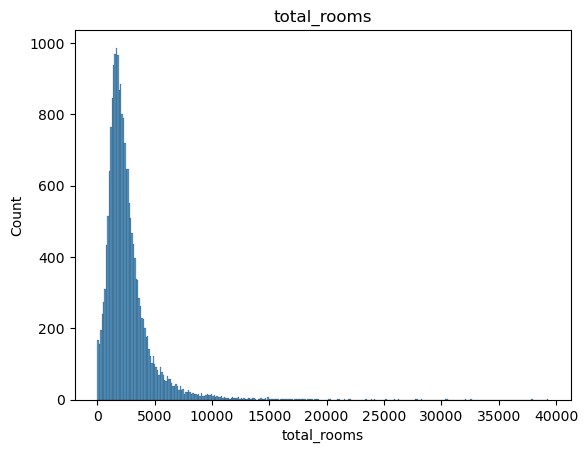

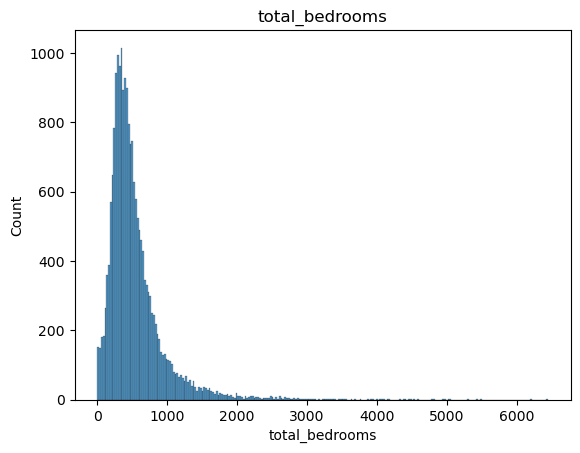

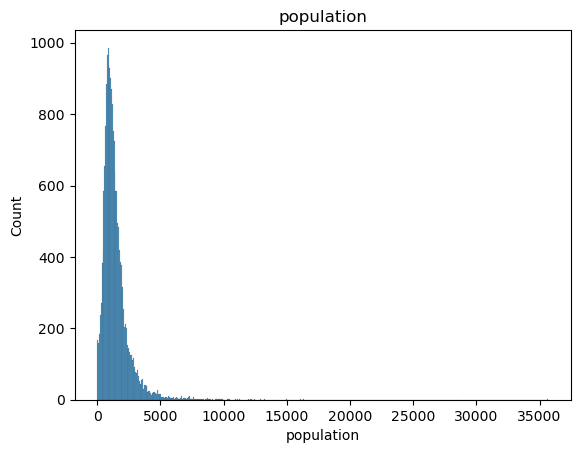

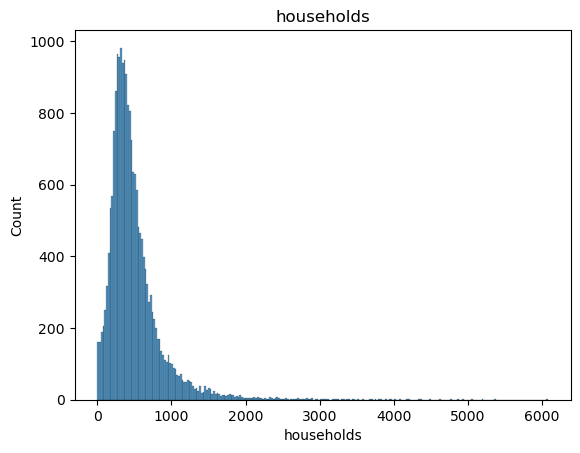

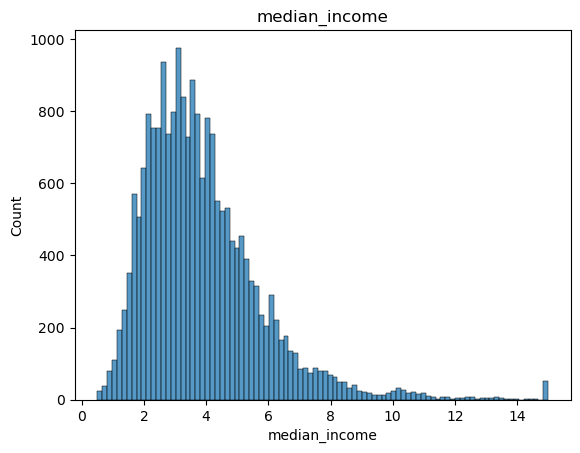

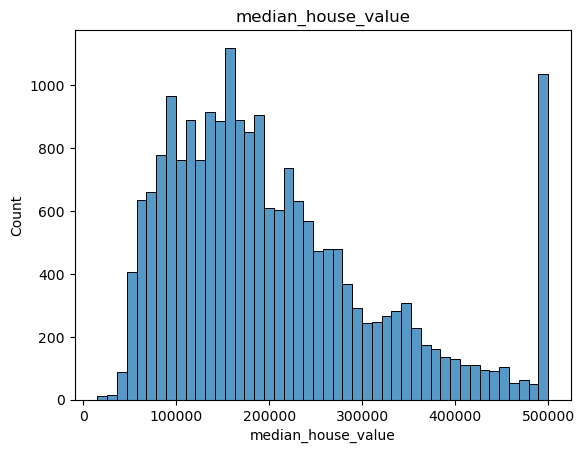

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

data_nm = data._get_numeric_data()

for col in data_nm:
    sns.histplot(data=data, x=col)
    plt.title(col)
    plt.show()

In [8]:
#sns.pairplot(data_nm, hue='median_income')
#plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [9]:
data_cl = data.dropna()

In [10]:
print(data_cl.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [11]:
col_new = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]

data_cl[col_new[0]] = data_cl["total_rooms"] / data_cl["households"]

C:\Users\bianc\AppData\Local\Temp\ipykernel_5828\1331700321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl[col_new[0]] = data_cl["total_rooms"] / data_cl["households"]


In [12]:
data_cl[col_new[1]] = data_cl["population"] / data_cl["households"]

C:\Users\bianc\AppData\Local\Temp\ipykernel_5828\3610720570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl[col_new[1]] = data_cl["population"] / data_cl["households"]


In [13]:
data_cl[col_new[2]] = data_cl["total_bedrooms"] / data_cl["total_rooms"]

print(data_cl.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  population_per_household  bedrooms_per_room 

C:\Users\bianc\AppData\Local\Temp\ipykernel_5828\677918942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl[col_new[2]] = data_cl["total_bedrooms"] / data_cl["total_rooms"]


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [14]:
#print("\nrooms_per_household:\n describe:\n", data_cl["rooms_per_household"].describe())

print("\nrooms_per_household:\n sort values:\n", data_cl["rooms_per_household"].sort_values())

idx_max =  data_cl["rooms_per_household"].idxmax()
#print("idx_max = ", idx_max)
data_cl2 = data_cl.drop(idx_max)


rooms_per_household:
 sort values:
 5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: rooms_per_household, Length: 20433, dtype: float64


In [15]:
idx_max =  data_cl2["rooms_per_household"].idxmax()
data_cl2.drop(idx_max, inplace=True)

print("\nrooms_per_household:\n sort values:\n", data_cl2["rooms_per_household"].sort_values())


rooms_per_household:
 sort values:
 5916      0.846154
8219      0.888889
3126      1.000000
14818     1.130435
17820     1.130435
           ...    
9676     52.848214
1912     56.269231
11862    59.875000
1913     61.812500
12447    62.422222
Name: rooms_per_household, Length: 20431, dtype: float64


In [16]:
idx_min =  data_cl2["rooms_per_household"].idxmin()
data_cl2.drop(idx_min, inplace=True)

In [17]:
idx_min =  data_cl2["rooms_per_household"].idxmin()
data_cl2.drop(idx_min, inplace=True)

print("\nrooms_per_household:\n sort values:\n", data_cl2["rooms_per_household"].sort_values())


rooms_per_household:
 sort values:
 3126      1.000000
14818     1.130435
17820     1.130435
4552      1.260870
4550      1.378486
           ...    
9676     52.848214
1912     56.269231
11862    59.875000
1913     61.812500
12447    62.422222
Name: rooms_per_household, Length: 20429, dtype: float64


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

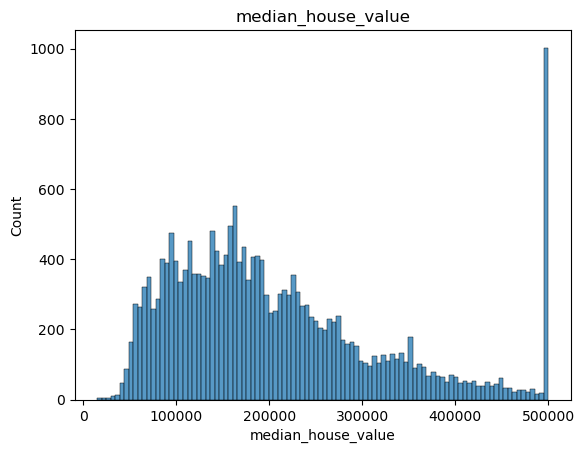

In [18]:
sns.histplot(data=data_cl2["median_house_value"], bins=100)
plt.title("median_house_value")
plt.show()

2. Check out what variables correlates the most with "median house value"

In [19]:
corr = data_cl2.select_dtypes(include="number").corr()
print(corr)

idx_max_corr = corr["median_house_value"].sort_values(ascending=False).index[1]
print("The maximum correlation for 'median_house_value' is with ", idx_max_corr)

                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924681           -0.109405   
latitude                  -0.924681  1.000000            0.011902   
housing_median_age        -0.109405  0.011902            1.000000   
total_rooms                0.045547 -0.036704           -0.360561   
total_bedrooms             0.069682 -0.067038           -0.320379   
population                 0.100329 -0.108935           -0.295697   
households                 0.056566 -0.071698           -0.302677   
median_income             -0.015558 -0.079591           -0.118251   
median_house_value        -0.045342 -0.144894            0.106462   
rooms_per_household       -0.030388  0.115755           -0.182090   
population_per_household   0.002307  0.002525            0.013269   
bedrooms_per_room          0.092589 -0.113787            0.135810   

                          total_rooms  total_bedrooms  population  households  \
longitude            

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

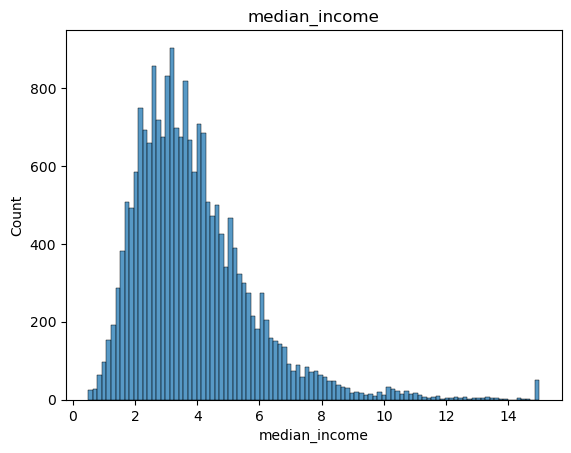

In [20]:
sns.histplot(data=data_cl2[idx_max_corr], bins=100)
plt.title(idx_max_corr)
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

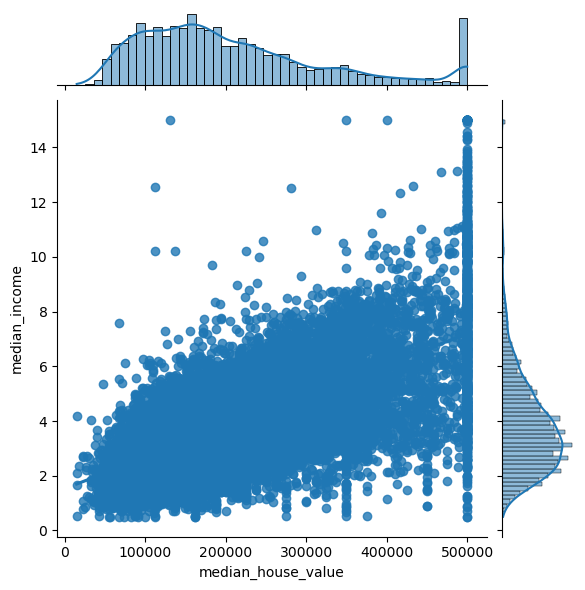

In [21]:
sns.jointplot(data=data_cl2, x="median_house_value", y="median_income", kind="reg")
plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

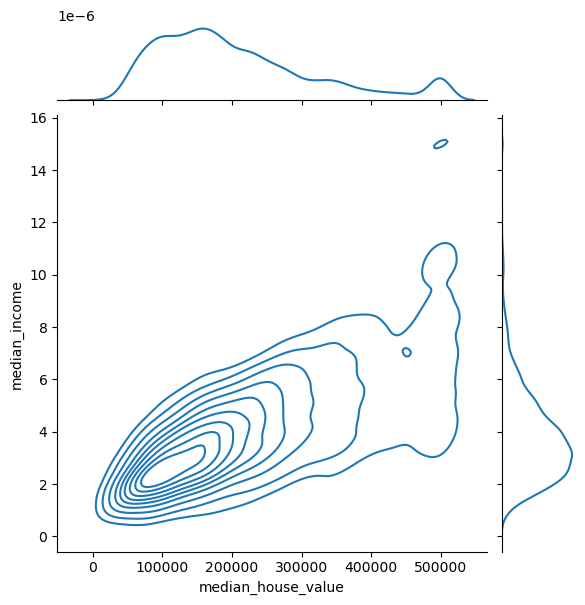

In [22]:
sns.jointplot(data=data_cl2, x="median_house_value", y="median_income", kind="kde")
plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [23]:
#print("\nmedian_income:\n describe:\n", data_cl2["median_income"].describe())

q0 = data_cl2["median_income"].quantile(0)
q1 = data_cl2["median_income"].quantile(0.25)
q2 = data_cl2["median_income"].quantile(0.5)
q3 = data_cl2["median_income"].quantile(0.75)
q4 = data_cl2["median_income"].quantile(0.95)
q5 = data_cl2["median_income"].quantile(1)

print("quantile 0% = ", q0)
print("quantile 25% = ", q1)
print("quantile 50% = ", q2)
print("quantile 75% = ", q3)
print("quantile 95% = ", q4)
print("quantile 100% = ", q5)

def mapping(val):
    if(val < q1):
        return "Low"
    elif (val < q2):
        return "Below_Average"
    elif (val < q3):
        return "Above_Average"
    elif (val < q4):
        return "High"
    else:
        return "Very_High"

data_cl2["income_cat"]  = [mapping(x) for x in data_cl2["median_income"]]
print("data = \n", data_cl2.head())


quantile 0% =  0.4999
quantile 25% =  2.5637
quantile 50% =  3.5365
quantile 75% =  4.744
quantile 95% =  7.3003599999999995
quantile 100% =  15.0001
data = 
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NE

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

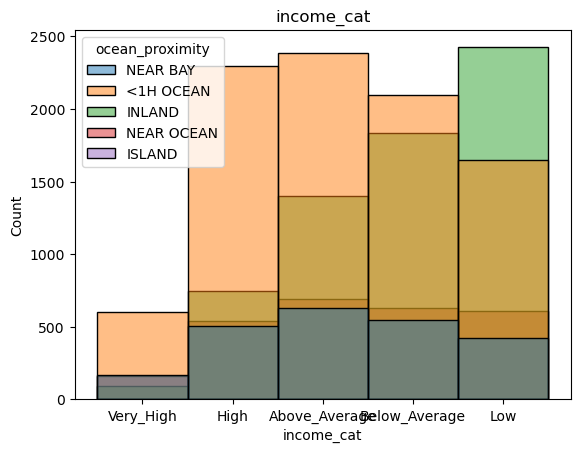

In [24]:
sns.histplot(data=data_cl2, x="income_cat", hue="ocean_proximity")
plt.title("income_cat")
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

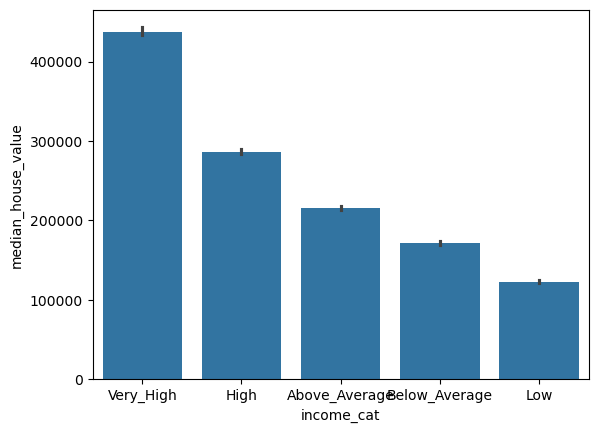

In [25]:
sns.barplot(data=data_cl2, x="income_cat", y="median_house_value")
plt.show()

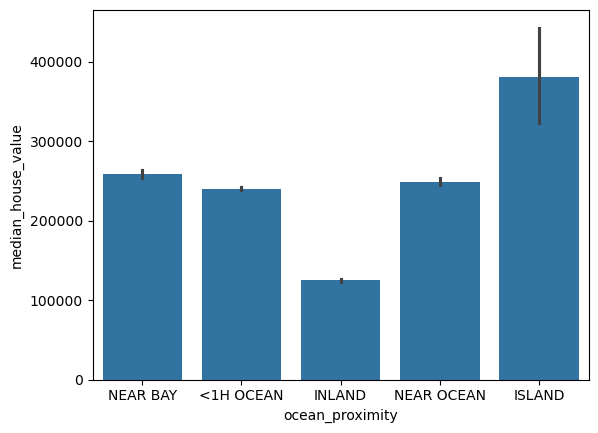

In [26]:
sns.barplot(data=data_cl2, x="ocean_proximity", y="median_house_value")
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [27]:
data_pivot = data_cl2.pivot_table(index="income_cat", columns="ocean_proximity", values="median_income", aggfunc="count")
print(data_pivot)

ocean_proximity  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
income_cat                                                      
Above_Average       2386.0  1398.0     NaN     631.0       691.0
Below_Average       2097.0  1834.0     4.0     546.0       626.0
High                2297.0   744.0     NaN     506.0       540.0
Low                 1650.0  2423.0     1.0     422.0       611.0
Very_High            603.0    95.0     NaN     165.0       159.0


In [28]:
data_pivot.drop(columns="ISLAND", inplace=True)
print(data_pivot)

ocean_proximity  <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
income_cat                                              
Above_Average       2386.0  1398.0     631.0       691.0
Below_Average       2097.0  1834.0     546.0       626.0
High                2297.0   744.0     506.0       540.0
Low                 1650.0  2423.0     422.0       611.0
Very_High            603.0    95.0     165.0       159.0


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

<Axes: xlabel='ocean_proximity', ylabel='income_cat'>

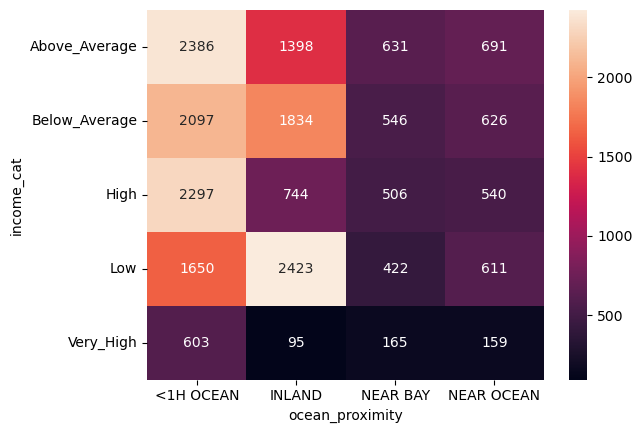

In [29]:
sns.heatmap(data_pivot, annot=True, fmt=".0f")

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [30]:
data_cl3 = data_cl2.drop("income_cat", axis=1)

print(data_cl3.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  population_per_household  bedrooms_per_room 

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [31]:
import scipy.stats as stats

print(data_cl3.info())

data_cl4 = data_cl3.select_dtypes(include=["float"])

print(data_cl4.info())

z_scored = data_cl4.apply(lambda col: stats.zscore(col))

print(z_scored.head())

<class 'pandas.core.frame.DataFrame'>
Index: 20429 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20429 non-null  float64
 1   latitude                  20429 non-null  float64
 2   housing_median_age        20429 non-null  float64
 3   total_rooms               20429 non-null  float64
 4   total_bedrooms            20429 non-null  float64
 5   population                20429 non-null  float64
 6   households                20429 non-null  float64
 7   median_income             20429 non-null  float64
 8   median_house_value        20429 non-null  float64
 9   ocean_proximity           20429 non-null  object 
 10  rooms_per_household       20429 non-null  float64
 11  population_per_household  20429 non-null  float64
 12  bedrooms_per_room         20429 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB
None
<class 'panda

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [32]:
col_obj = data_cl3.select_dtypes(include=["object"]).columns

data_dummy = pd.get_dummies(data_cl3[col_obj], drop_first = True)

print(data_dummy.head())

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  


4. Save our predicting variable to `y`.

In [33]:
y = data_cl3["median_house_value"]

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [34]:
x = pd.concat([z_scored, data_dummy], axis=1)
x.drop("median_house_value", axis=1, inplace=True)
print(x.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327178  1.051835            0.982245    -0.803953       -0.970467   
1  -1.322187  1.042473           -0.606063     2.041934        1.348104   
2  -1.332169  1.037792            1.855815    -0.535335       -0.825704   
3  -1.337160  1.037792            1.855815    -0.623654       -0.718913   
4  -1.337160  1.037792            1.855815    -0.462117       -0.612121   

   population  households  median_income  rooms_per_household  \
0   -0.973604   -0.977135       2.344991             0.741063   
1    0.861142    1.670222       2.332460             0.387873   
2   -0.820046   -0.843721       1.782799             1.358446   
3   -0.765330   -0.733850       0.932878             0.188652   
4   -0.759153   -0.629212      -0.013181             0.408571   

   population_per_household  bedrooms_per_room  ocean_proximity_INLAND  \
0                 -0.049440          -1.151198                   False   
1         

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

In [37]:
y_train_pred = model.predict(X_train)

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

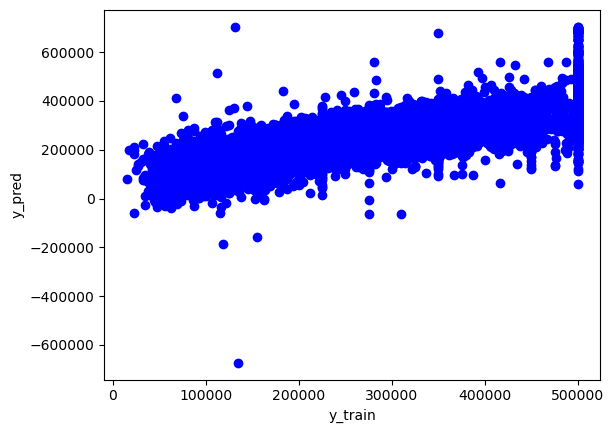

In [38]:
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel("y_train")
plt.ylabel("y_pred")
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [39]:
from sklearn import metrics

r2 = metrics.r2_score(y_train_pred, y_train)
print("r2 (train) = ", r2)

r2 (train) =  0.47268290710331173


In [40]:
mse = metrics.mean_squared_error(y_train_pred, y_train)
print("mse (train) = ", mse)

mse (train) =  4606522771.141768


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [41]:
y_test_pred = model.predict(X_test)

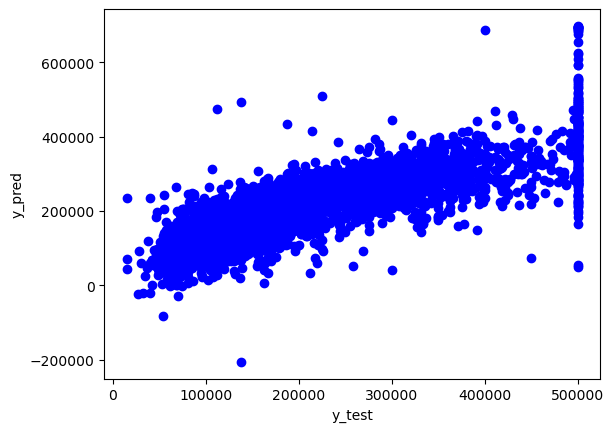

In [42]:
plt.scatter(y_test, y_test_pred, color='blue')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [43]:
r2 = metrics.r2_score(y_test_pred, y_test)
print("r2 (test) = ", r2)

r2 (test) =  0.47034683505722197


In [44]:
mse = metrics.mean_squared_error(y_test_pred, y_test)
print("mse (test) = ", mse)

mse (test) =  4588193539.606025


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [45]:
rmse = metrics.root_mean_squared_error(y_test_pred, y_test)
print("rmse (test) = ", rmse)

rmse (test) =  67736.20553002674


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [46]:
print("y_test.shape = ", y_test.shape)
print("y_test_pred.shape = ", y_test_pred.shape)

df = pd.DataFrame(
    {"y_test": y_test,
    "y_test_pred": y_test_pred})

print(df.shape)

print(df.head())

y_test.shape =  (4086,)
y_test_pred.shape =  (4086,)
(4086, 2)
         y_test    y_test_pred
9967   187500.0  178049.481953
6695   210900.0  169494.622946
342     82000.0  175981.789503
8502   214700.0  219545.569678
18999  150200.0  217258.756414


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [54]:
#print(df.head())

absolute_errors = (df['y_test'] - df['y_test_pred']).abs()

print(absolute_errors)

9967      9450.518047
6695     41405.377054
342      93981.789503
8502      4845.569678
18999    67058.756414
             ...     
6430     37933.797790
3248     47064.362332
7145     19531.768158
13186    20618.381006
4747     46649.067146
Length: 4086, dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [55]:
mae = absolute_errors.mean()
print("mae = ", mae)

mae =  49118.392994851856


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model_rf = RandomForestRegressor(max_depth=2, random_state=0)

In [61]:
model_rf = model_rf.fit(X_train, y_train)

2. Make prediction on the test data and evaluate you results.

In [68]:
y_pred_train = model_rf.predict(X_train)

In [67]:
y_pred_test = model_rf.predict(X_test)

In [69]:
r2_score_train = metrics.r2_score(y_train, y_train_pred)
r2_score_test = metrics.r2_score(y_test, y_test_pred)


In [70]:
mse_train = metrics.mean_squared_error(y_train_pred, y_train)
mse_test = metrics.mean_squared_error(y_test_pred, y_test)

mae_train = metrics.mean_absolute_error(y_train_pred, y_train)
mae_test = metrics.mean_absolute_error(y_test_pred, y_test)

In [71]:
print(f"(Train) r2 = {r2_score_train} , mse = {mse_train}, mae = {mae_train}")
print(f"(Test) r2 = {r2_score_test} , mse = {mse_test}, mae = {mae_test}")

(Train) r2 = 0.6547428851879176 , mse = 4606522771.141768, mae = 49015.32894768339
(Test) r2 = 0.6535019206173325 , mse = 4588193539.606025, mae = 49118.392994851856
